In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

## Data Cleaning

In [70]:
df = pd.read_table('data.txt', sep='\t', encoding= 'ISO-8859-1', header=None)

cols_name = {
    0 : 'Player',
    1 : 'Club',
    2 : 'Amount',
    3 : 'Date'
}

df = df.rename(cols_name, axis = 'columns')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by = 'Date', ascending = False)

df.to_csv('summertransfer.csv')

#Because transfe window now closes 3 weeks before what it usually did for the past several years
#Trying to account for that by deducting 3 weeks from all dates
#Comment out this line as necessary
#df['Date'] = df['Date'] - pd.Timedelta(days = 21)

def add_details(df):
    df['DayName'] = df['Date'].dt.day_name()
    df['MonthName'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    
    return df

df = add_details(df)



#We are interested only in summer signings. This could be anytime after the winter windows closes,
#and before the transfer window ends (mostly 31 August until 2018/19 Season)

logic = (df['Month'] > 2) & (df['Month'] < 10) 
df = df[logic]

pre = df[df['Year'] < 2013]
post = df[df['Year'] > 2012]

In [54]:
df.set_index(['Year', 'Player']).head()

Club       Amount       Date   DayName MonthName  Day  \
Year Player                                                                     
2018 Lee Grant         Stoke   £1,500,000 2018-07-03   Tuesday      July    3   
     Fred           Shakhtar  £52,000,000 2018-06-21  Thursday      June   21   
     Diogo Dalot       Porto  £19,000,000 2018-06-08    Friday      June    8   
2017 Nemanja Matic   Chelsea  £40,000,000 2017-07-31    Monday      July   31   
     Romelu Lukaku   Everton  £75,000,000 2017-07-10    Monday      July   10   

                    Month  
Year Player                
2018 Lee Grant          7  
     Fred               6  
     Diogo Dalot        6  
2017 Nemanja Matic      7  
     Romelu Lukaku      7

## Visualization

<IPython.core.display.Javascript object>


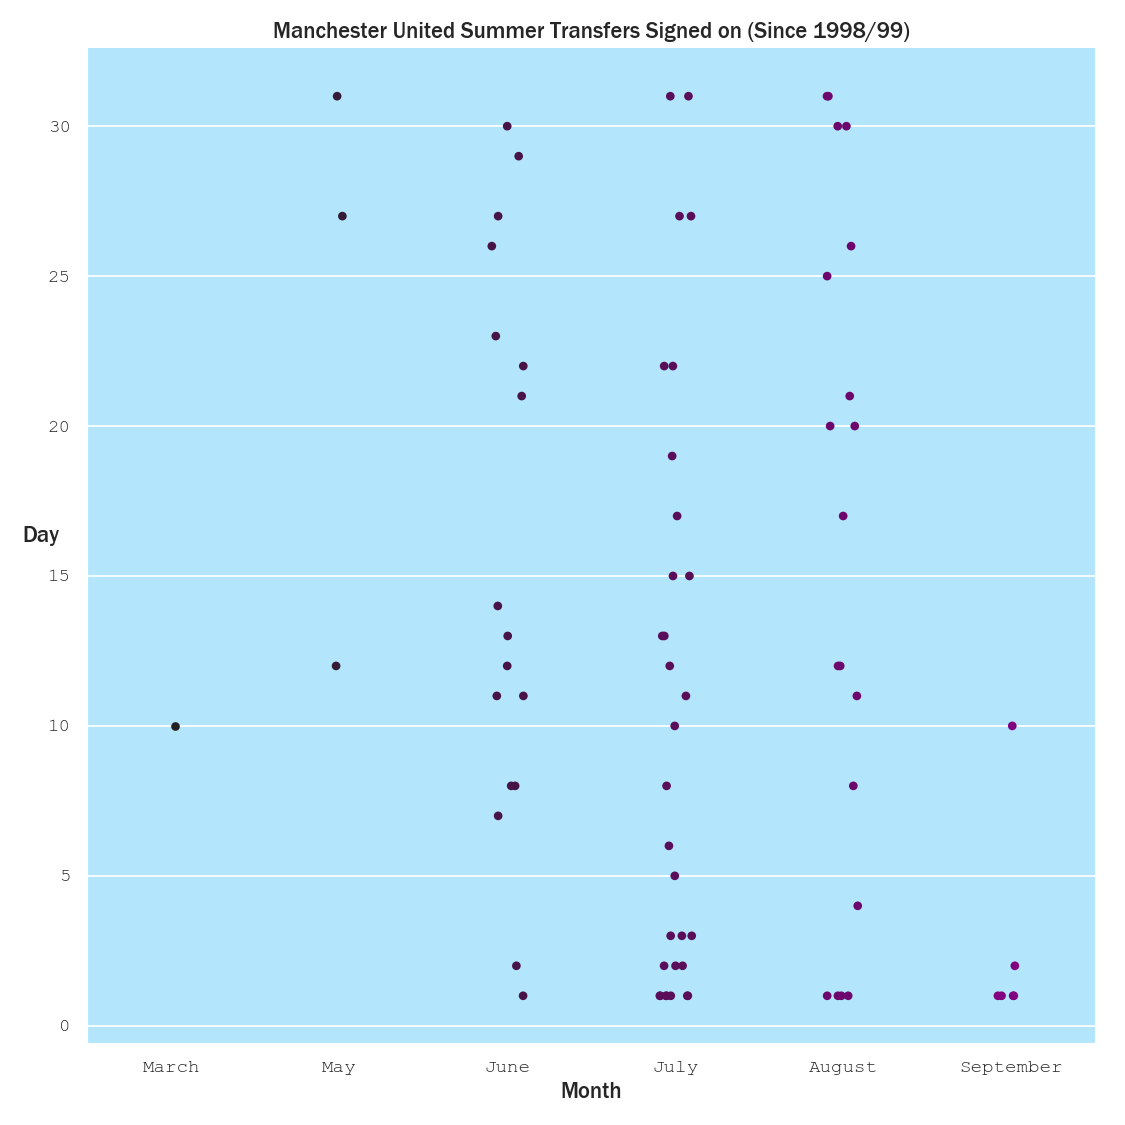

In [55]:
#Scatter Plot of transfers

sns.set()
#sns.set_palette("Blacks_d")

sns.set_style("darkgrid", {"axes.facecolor": "#b3e5fc"})
ord = ['March', 'May', 'June', 'July', 'August', 'September']
sns.catplot(x = "MonthName", y = "Day", data = df, order = ord, palette=sns.dark_palette("purple"), height = 9)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(), family = "Courier New", fontsize = 11)
ax.set_yticklabels(ax.get_yticklabels(), family = "Courier New", fontsize = 11)

ax.set_xlabel("Month", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Day", rotation = 0, family = "Franklin Gothic Medium", fontsize = 13)

ax.set_title("Manchester United Summer Transfers Signed on (Since 1998/99)", family ="Franklin Gothic Medium", fontsize = 13 )

plt.tight_layout()
fig = plt.gcf()
fig.savefig("transfer_scatter.jpg", dpi = 500)

<IPython.core.display.Javascript object>


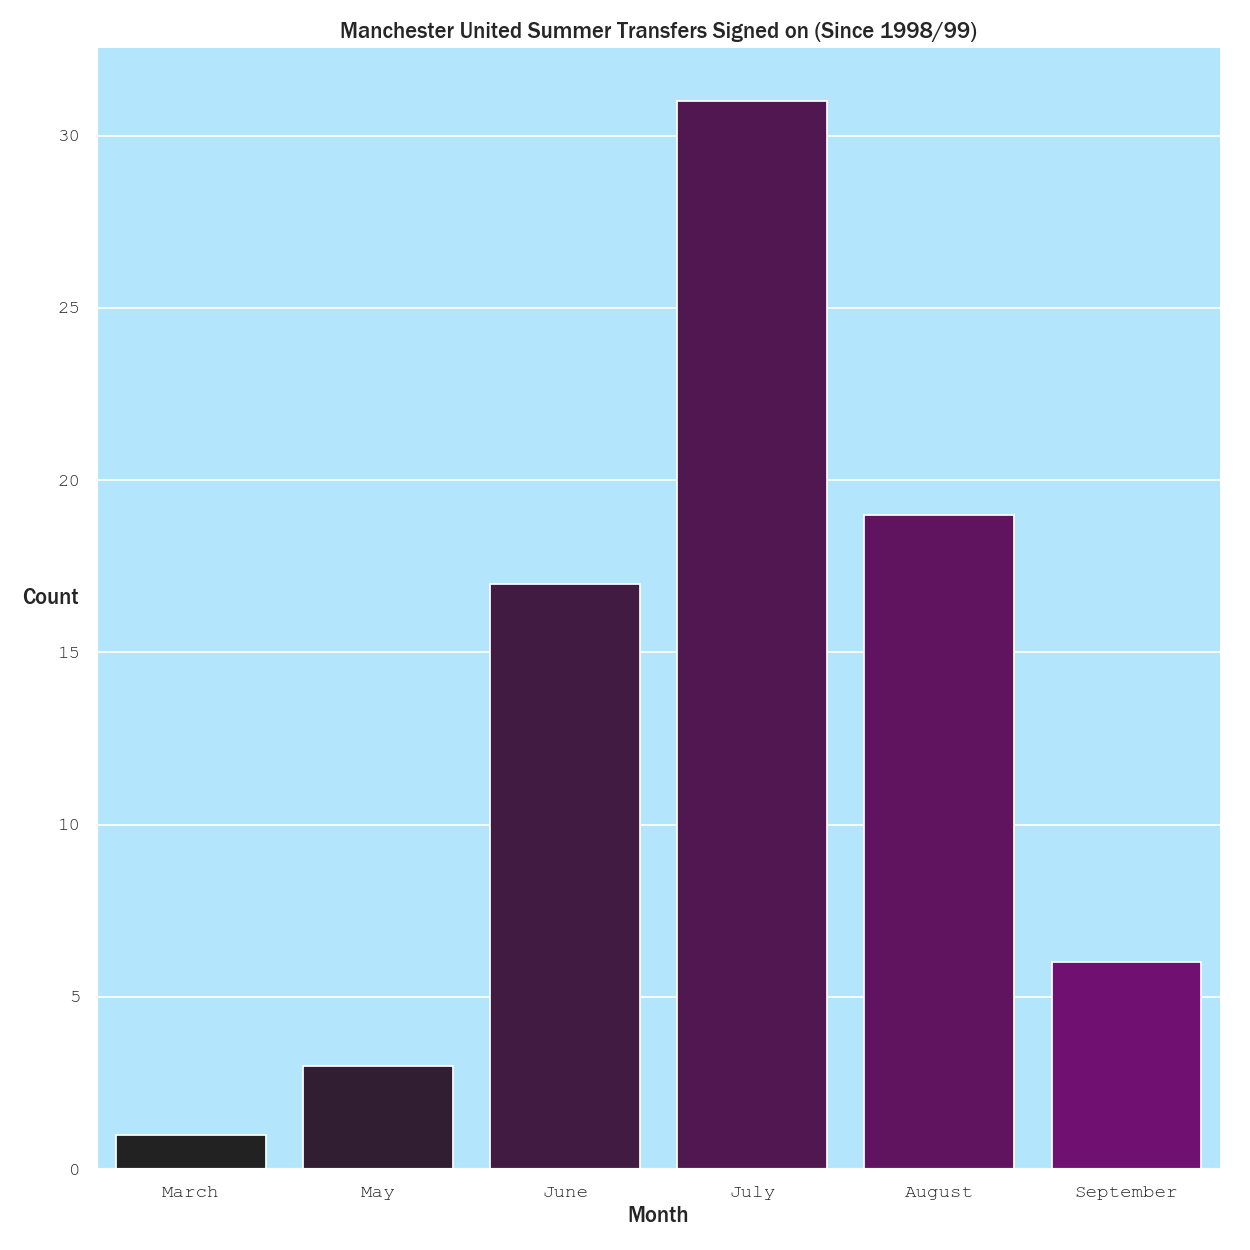

In [57]:
#Count plot for months

sns.set(rc={'figure.figsize':(14, 11)})
sns.set_palette("Reds_d")
sns.set_style("darkgrid", {"axes.facecolor": "#b3e5fc"})

sns.catplot(x = "MonthName", kind = "count",palette=sns.dark_palette("purple"), order = ord, data = df, height = 10)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(), family = "Courier New", fontsize = 11)
ax.set_yticklabels(ax.get_yticklabels(), family = "Courier New", fontsize = 11)

ax.set_xlabel("Month", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Count", rotation = 0, family = "Franklin Gothic Medium", fontsize = 13)

ax.set_title("Manchester United Summer Transfers Signed on (Since 1998/99)", family ="Franklin Gothic Medium", fontsize = 13 )

plt.tight_layout()
fig = plt.gcf()

fig.savefig('count_month.jpg', dpi = 500)


<IPython.core.display.Javascript object>


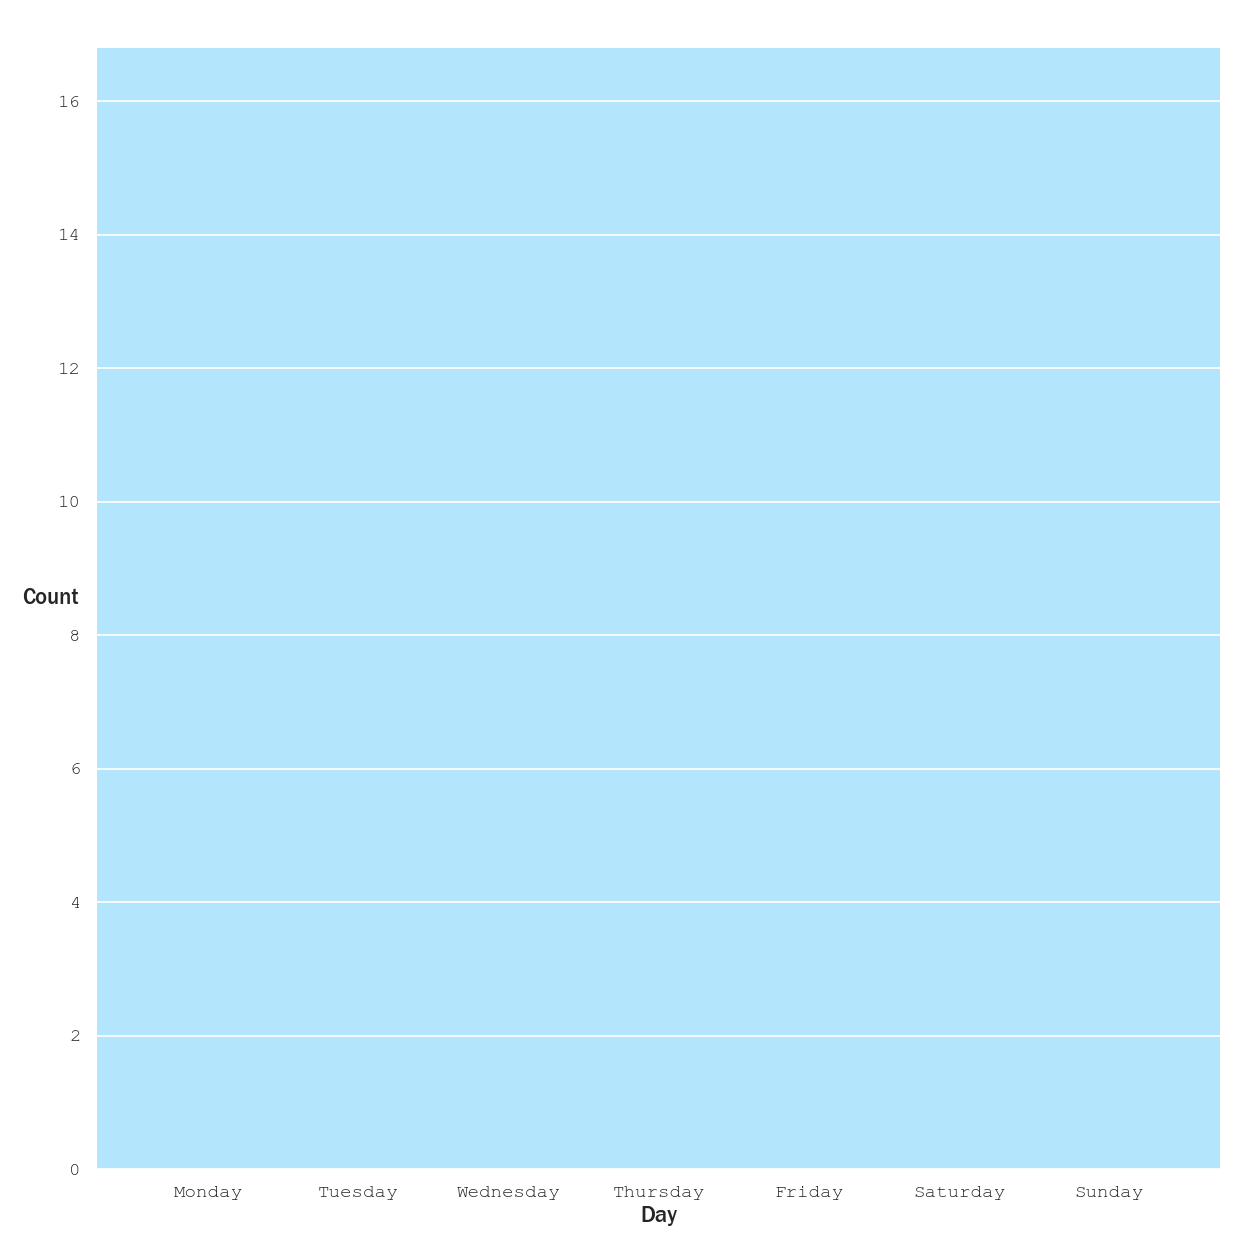

In [58]:
#Count plot for days

sns.set()
sns.set_palette(palette=sns.dark_palette("purple"))
sns.set_style("darkgrid", {"axes.facecolor": "#b3e5fc"})

od = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.catplot(x = "DayName", kind = "count",palette=sns.dark_palette("purple"), order = od, data = df, height = 10)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(), family = "Courier New", fontsize = 11)
ax.set_yticklabels(ax.get_yticklabels(), family = "Courier New", fontsize = 11)

ax.set_xlabel("Day", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Count", rotation = 0, family = "Franklin Gothic Medium", fontsize = 13)

ax.set_title("Manchester United Summer Transfers Signed on (Since 1998/99)", family ="Franklin Gothic Medium", fontsize = 13 )

plt.tight_layout()

fig = plt.gcf()

fig.savefig('count_day.jpg', dpi = 500)

In [59]:
df[df['Month'] == 9]

,Player,Club,Amount,Date,DayName,MonthName,Year,Day,Month
12,Regan Poole,Newport Co,"£100,000",2015-09-01,Tuesday,September,2015,1,9
13,Anthony Martial,Monaco,"£36,000,000",2015-09-01,Tuesday,September,2015,1,9
22,Daley Blind,Ajax,"£13,800,000",2014-09-01,Monday,September,2014,1,9
25,Marouane Fellaini,Everton,"£27,500,000",2013-09-02,Monday,September,2013,2,9
49,Dimitar Berbatov,Tottenham,"£30,750,000",2008-09-01,Monday,September,2008,1,9
87,Mikael Silvestre,Inter,"£4,000,000",1999-09-10,Friday,September,1999,10,9


Considering the fact that we are making so many early moves this early in summer, I was wondering how we operated usually. Scraping data for the past 20 Years, revealed some interested thoughts.

1. We've only ever signed 3 Players in May
2. The last time we signed a player in May, it was Alan Smith from Leeds. 15 YEARS ago.
3. July is the month we are most active in, followed by August (likely to change considering the new transfer deadlines)
4. Least likely to announce signings over the weekends (sort of obvious)

TLDR : Considering James's signings has been all but officially confirmed, I think this is a really positive start.

### Comparison Pre and Post Ed

In [61]:
pre.head()


,Player,Club,Amount,Date,DayName,MonthName,Year,Day,Month
30,Alexander Buttner,Vitesse Arn.,Signed,2012-08-21,Tuesday,August,2012,21,8
29,Robin van Persie,Arsenal,"£24,000,000",2012-08-17,Friday,August,2012,17,8
28,Angelo Henriquez,Univ de Chile,Youth,2012-08-01,Wednesday,August,2012,1,8
27,Shinji Kagawa,B Dortmund,"£12,000,000",2012-06-22,Friday,June,2012,22,6
35,Nick Powell,Crewe,"£4,000,000",2012-06-12,Tuesday,June,2012,12,6


In [62]:
post.head()

,Player,Club,Amount,Date,DayName,MonthName,Year,Day,Month
0,Lee Grant,Stoke,"£1,500,000",2018-07-03,Tuesday,July,2018,3,7
5,Fred,Shakhtar,"£52,000,000",2018-06-21,Thursday,June,2018,21,6
4,Diogo Dalot,Porto,"£19,000,000",2018-06-08,Friday,June,2018,8,6
2,Nemanja Matic,Chelsea,"£40,000,000",2017-07-31,Monday,July,2017,31,7
1,Romelu Lukaku,Everton,"£75,000,000",2017-07-10,Monday,July,2017,10,7


In [71]:
pre['Period'] = 'Till 2012'
post['Period'] = 'From 2013'

C:\Users\ranja\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ranja\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
pre.head()

,Player,Club,Amount,Date,DayName,MonthName,Year,Day,Month,Period
30,Alexander Buttner,Vitesse Arn.,Signed,2012-08-21,Tuesday,August,2012,21,8,Till 2012
29,Robin van Persie,Arsenal,"£24,000,000",2012-08-17,Friday,August,2012,17,8,Till 2012
28,Angelo Henriquez,Univ de Chile,Youth,2012-08-01,Wednesday,August,2012,1,8,Till 2012
27,Shinji Kagawa,B Dortmund,"£12,000,000",2012-06-22,Friday,June,2012,22,6,Till 2012
35,Nick Powell,Crewe,"£4,000,000",2012-06-12,Tuesday,June,2012,12,6,Till 2012


In [73]:
post.head()

,Player,Club,Amount,Date,DayName,MonthName,Year,Day,Month,Period
0,Lee Grant,Stoke,"£1,500,000",2018-07-03,Tuesday,July,2018,3,7,From 2013
5,Fred,Shakhtar,"£52,000,000",2018-06-21,Thursday,June,2018,21,6,From 2013
4,Diogo Dalot,Porto,"£19,000,000",2018-06-08,Friday,June,2018,8,6,From 2013
2,Nemanja Matic,Chelsea,"£40,000,000",2017-07-31,Monday,July,2017,31,7,From 2013
1,Romelu Lukaku,Everton,"£75,000,000",2017-07-10,Monday,July,2017,10,7,From 2013


<IPython.core.display.Javascript object>


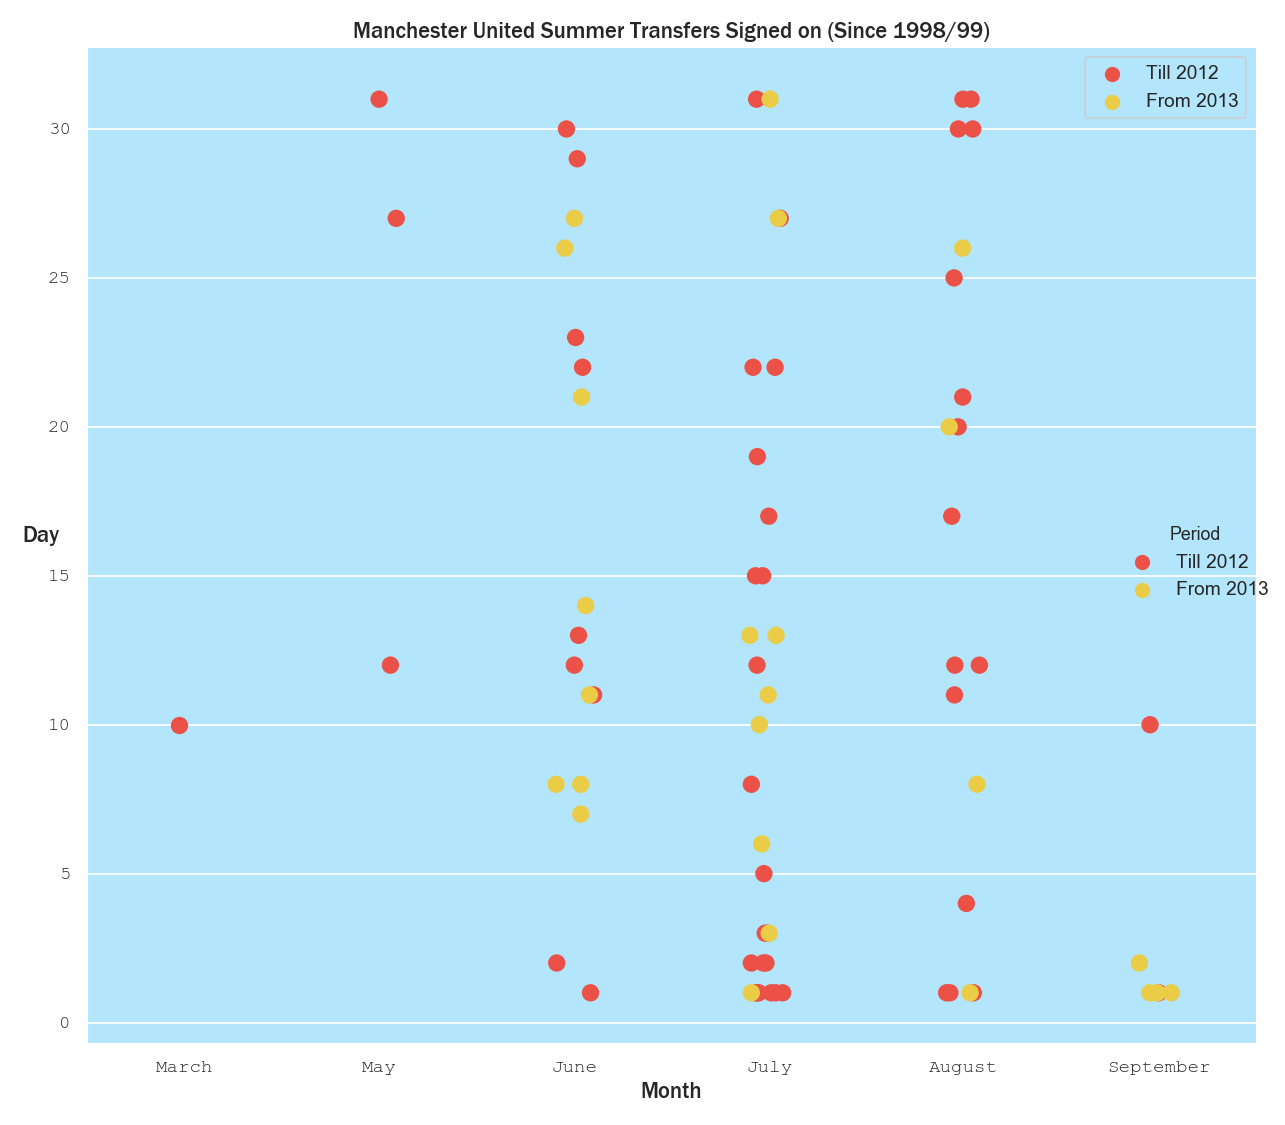

In [112]:
sns.set()

both = pd.concat([pre, post])

sns.set_style("darkgrid", {"axes.facecolor": "#b3e5fc"})
ord = ['March', 'May', 'June', 'July', 'August', 'September']
g = sns.catplot(x = "MonthName", y = "Day", hue = "Period", data = both, order = ord, height = 9, s =10, palette=sns.hls_palette(8, l=.6, s=.8))

ax = plt.gca()

palette=sns.dark_palette("purple")

ax.set_xticklabels(ax.get_xticklabels(), family = "Courier New", fontsize = 11)
ax.set_yticklabels(ax.get_yticklabels(), family = "Courier New", fontsize = 11)

ax.set_xlabel("Month", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Day", rotation = 0, family = "Franklin Gothic Medium", fontsize = 13)

ax.set_title("Manchester United Summer Transfers Signed on (Since 1998/99)", family ="Franklin Gothic Medium", fontsize = 13 )

plt.tight_layout()
fig = plt.gcf()
fig.savefig("comparison.jpg", dpi = 500)

